<a href="https://colab.research.google.com/github/nivethanancroos/SmartWasteClassifier/blob/main/Smart_Waste_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # optional if using Drive


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80/20 split
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset-resized (1)/dataset-resized',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset-resized (1)/dataset-resized',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2028 images belonging to 6 classes.
Found 505 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1269s 20s/step - accuracy: 0.2458 - loss: 1.7767 - val_accuracy: 0.4119 - val_loss: 1.5355
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4877 - loss: 1.3388 - val_accuracy: 0.4158 - val_loss: 1.5023
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5253 - loss: 1.1947 - val_accuracy: 0.4396 - val_loss: 1.4148
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5927 - loss: 1.0349 - val_accuracy: 0.4634 - val_loss: 1.4001
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6108 - loss: 0.9872 - val_accuracy: 0.5327 - val_loss: 1.2707
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6524 - loss: 0.9134 - val_accuracy: 0.5327 - val_loss: 1.2350
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6733 - loss: 0.8730 - val_accuracy: 0.5663 - val_loss: 1.2265
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6524 - loss: 0.9109 - val_accuracy: 0.5564 - val_lo

In [ ]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 487ms/step - accuracy: 0.5312 - loss: 1.3011
Validation Accuracy: 53.07%


In [ ]:
import pandas as pd

preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

df = pd.DataFrame({
    "True": y_true,
    "Predicted": y_pred
})
df.to_csv("classification_results.csv", index=False)


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 533ms/step


In [ ]:
import cv2

# Load an image (replace with your file path)
img_path = "/content/test_image.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (128,128)) / 255.0

# Expand dimensions (to make it batch size = 1)
img_input = np.expand_dims(img_resized, axis=0)

# Predict
pred = model.predict(img_input)
class_idx = np.argmax(pred)
class_labels = list(train_generator.class_indices.keys())

print(f"Predicted Category: {class_labels[class_idx]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Category: metal


In [ ]:
import cv2

# Load an image (replace with your file path)
img_path = "/content/test_image2.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (128,128)) / 255.0

# Expand dimensions (to make it batch size = 1)
img_input = np.expand_dims(img_resized, axis=0)

# Predict
pred = model.predict(img_input)
class_idx = np.argmax(pred)
class_labels = list(train_generator.class_indices.keys())

print(f"Predicted Category: {class_labels[class_idx]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Category: paper


Saving test_image.jpg to test_image (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


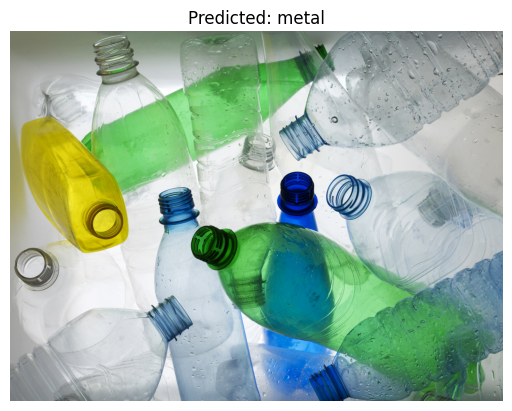

Predicted Category: metal
metal detected → Sorting to Bin 3


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image from your PC
uploaded = files.upload()

for filename in uploaded.keys():
    # Read and preprocess
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128,128)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    # Prediction
    pred = model.predict(img_input)
    class_idx = np.argmax(pred)
    class_labels = list(train_generator.class_indices.keys())

    # Show result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[class_idx]}")
    plt.show()

    print(f"Predicted Category: {class_labels[class_idx]}")
    print(f"{class_labels[class_idx]} detected → Sorting to Bin {class_idx+1}")


Saving test_image2.jpg to test_image2 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


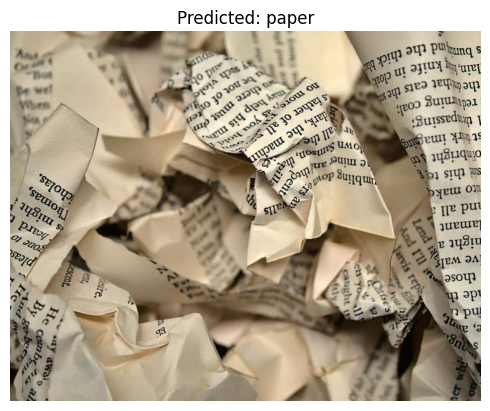

Predicted Category: paper
paper detected → Sorting to Bin 4


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image from your PC
uploaded = files.upload()

for filename in uploaded.keys():
    # Read and preprocess
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128,128)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    # Prediction
    pred = model.predict(img_input)
    class_idx = np.argmax(pred)
    class_labels = list(train_generator.class_indices.keys())

    # Show result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[class_idx]}")
    plt.show()

    print(f"Predicted Category: {class_labels[class_idx]}")
    print(f"{class_labels[class_idx]} detected → Sorting to Bin {class_idx+1}")


Saving test_image3.jpg to test_image3 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


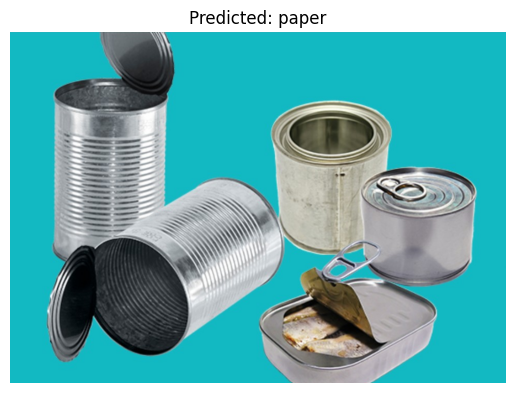

Predicted Category: paper
paper detected → Sorting to Bin 4


In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image from your PC
uploaded = files.upload()

for filename in uploaded.keys():
    # Read and preprocess
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128,128)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    # Prediction
    pred = model.predict(img_input)
    class_idx = np.argmax(pred)
    class_labels = list(train_generator.class_indices.keys())

    # Show result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[class_idx]}")
    plt.show()

    print(f"Predicted Category: {class_labels[class_idx]}")
    print(f"{class_labels[class_idx]} detected → Sorting to Bin {class_idx+1}")
